## Steps to follow:

1. Import the data
2. Explore the data and identify things that would be worth exploring
3. Write two functions to make two different kinds of plots using matplotlib and seaborn (one each)
4. It might be a good idea to look at one of the categorical variables (gender, race/ethinicity) and the test scores 
5. Push your work back and send me a link to the repo!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring the Data

In [102]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are no missing values in the dataframe

In [40]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [41]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [42]:
df.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [44]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

After examining the categorical variables, there don't seem to be any anomalous/placeholder values in the dataframe.

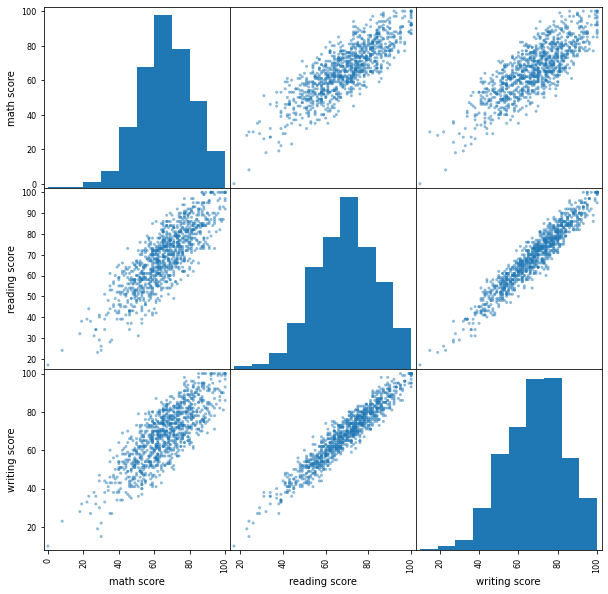

In [47]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

There is a stronger correlation between reading and writing scores than between math and other categories. Overall, it seems that scoring highly in one category corresponds to scoring highly across the board in all categories.

In [34]:
df.groupby(['gender', 'race/ethnicity']).mean()

math score  reading score  writing score
gender race/ethnicity                                          
female group A          58.527778      69.000000      67.861111
       group B          61.403846      71.076923      70.048077
       group C          62.033333      71.944444      71.777778
       group D          65.248062      74.046512      75.023256
       group E          70.811594      75.840580      75.536232
male   group A          63.735849      61.735849      59.150943
       group B          65.930233      62.848837      60.220930
       group C          67.611511      65.424460      62.712230
       group D          69.413534      66.135338      65.413534
       group E          76.746479      70.295775      67.394366

In [49]:
df.groupby(['gender', 'race/ethnicity']).std()

math score  reading score  writing score
gender race/ethnicity                                          
female group A          14.157252      14.847799      14.652455
       group B          16.256750      14.612598      14.891439
       group C          15.007224      13.900574      14.806595
       group D          14.174157      13.914842      13.866814
       group E          16.269129      15.349481      15.703671
male   group A          14.520742      15.451103      15.137061
       group B          14.156928      14.695752      14.854907
       group C          14.090037      13.291590      13.647341
       group D          13.094139      12.765829      13.262574
       group E          14.298570      13.966689      13.449885

In [59]:
df.groupby('gender').std()

,math score,reading score,writing score
gender,,,
female,15.491453,14.378245,14.844842
male,14.356277,13.931832,14.113832


Females tend to score more highly on reading & writing but lower on math, compared to males. Neither gender nor group seems to predict the spread of the scoring data, but the stddev of scores for females is a bit higher than that for males. Not sure if this is statistically significant

In [61]:
df.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [62]:
df.groupby(['race/ethnicity', 'lunch']).mean()

math score  reading score  writing score
race/ethnicity lunch                                                 
group A        free/reduced   55.222222      60.555556      57.194444
               standard       65.981132      67.471698      66.396226
group B        free/reduced   57.434783      63.971014      61.521739
               standard       66.884298      69.280992      67.925620
group C        free/reduced   56.412281      63.412281      61.412281
               standard       68.941463      72.268293      71.395122
group D        free/reduced   61.115789      66.431579      66.452632
               standard       70.916168      72.077844      72.245509
group E        free/reduced   66.560976      68.731707      67.195122
               standard       76.828283      74.808081      73.151515

In [63]:
df.groupby(['race/ethnicity', 'lunch']).count()

gender  parental level of education  \
race/ethnicity lunch                                               
group A        free/reduced      36                           36   
               standard          53                           53   
group B        free/reduced      69                           69   
               standard         121                          121   
group C        free/reduced     114                          114   
               standard         205                          205   
group D        free/reduced      95                           95   
               standard         167                          167   
group E        free/reduced      41                           41   
               standard          99                           99   

                             test preparation course  math score  \
race/ethnicity lunch                                               
group A        free/reduced                       36          36   
               standard                           53          53   
group B        free/reduced                       69          69   
               standard                          121         121   
group C        free/reduced                      114         114   
               standard                          205         205   
group D        free/reduced                       95          95   
               standard                          167         167   
group E        free/reduced                       41          41   
               standard                           99          99   

                             reading score  writing score  
race/ethnicity lunch                                       
group A        free/reduced             36             36  
               standard                 53             53  
group B        free/reduced             69             69  
               standard                121            121  
group C        free/reduced            114            114  
               standard                205            205  
group D        free/reduced             95             95  
               standard                167            167  
group E        free/reduced             41             41  
               standard                 99             99

There isn't much of a relationship between socioeconomic background and race/ethnicity, so the socioeconomic backgrounds of all groups are comparable. Race/ethnicity and socioeconomic background by themselves are predictors of test performance.

In [65]:
df.groupby(['test preparation course', 'race/ethnicity']).mean()

math score  reading score  \
test preparation course race/ethnicity                              
completed               group A          68.258065      71.032258   
                        group B          67.191176      72.852941   
                        group C          67.495726      73.658120   
                        group D          69.792683      74.146341   
                        group E          77.433333      76.666667   
none                    group A          58.086207      61.275862   
                        group B          61.368852      64.286885   
                        group C          62.707921      66.465347   
                        group D          66.255556      68.155556   
                        group E          71.112500      70.300000   

                                        writing score  
test preparation course race/ethnicity                 
completed               group A             70.903226  
                        group B             71.882353  
                        group C             74.452991  
                        group D             76.658537  
                        group E             75.983333  
none                    group A             58.275862  
                        group B             62.098361  
                        group C             63.990099  
                        group D             67.177778  
                        group E             67.975000

In [66]:
df.groupby(['test preparation course', 'race/ethnicity']).count()

gender  parental level of education  \
test preparation course race/ethnicity                                        
completed               group A             31                           31   
                        group B             68                           68   
                        group C            117                          117   
                        group D             82                           82   
                        group E             60                           60   
none                    group A             58                           58   
                        group B            122                          122   
                        group C            202                          202   
                        group D            180                          180   
                        group E             80                           80   

                                        lunch  math score  reading score  \
test preparation course race/ethnicity                                     
completed               group A            31          31             31   
                        group B            68          68             68   
                        group C           117         117            117   
                        group D            82          82             82   
                        group E            60          60             60   
none                    group A            58          58             58   
                        group B           122         122            122   
                        group C           202         202            202   
                        group D           180         180            180   
                        group E            80          80             80   

                                        writing score  
test preparation course race/ethnicity                 
completed               group A                    31  
                        group B                    68  
                        group C                   117  
                        group D                    82  
                        group E                    60  
none                    group A                    58  
                        group B                   122  
                        group C                   202  
                        group D                   180  
                        group E                    80

In [68]:
df.groupby(['lunch', 'test preparation course']).count()

gender  race/ethnicity  \
lunch        test preparation course                           
free/reduced completed                   131             131   
             none                        224             224   
standard     completed                   227             227   
             none                        418             418   

                                      parental level of education  math score  \
lunch        test preparation course                                            
free/reduced completed                                        131         131   
             none                                             224         224   
standard     completed                                        227         227   
             none                                             418         418   

                                      reading score  writing score  
lunch        test preparation course                                
free/reduced completed                          131            131  
             none                               224            224  
standard     completed                          227            227  
             none                               418            418

All race/ethnicity groups and socioeconomic backgrounds seem to have had similar exposure to test preparation courses, judging by the ratios of completed to none (131/224 and 227/418) in each lunch/socioeconomic category. Test prep courses definitely have a positive impact on test scores.  

### Summary of Observations

Socioeconomic background (standard v. free/reduced lunch) does not seem to be a function of race/ethnicity. Neither does access to a test prep course. The distribution of test prep course-takers and standard v. free lunch-eaters is similar across groups. Test prep courses, socioeconomic background, and race/ethnicity each seem to predict test scores. I did not examine the influence of parental level of education here. Females tend to score higher in reading and writing, but lower in math, compared to males.

## Visualization

### Boxplots

First, let's look at scores in each category with nest grouping of race/ethnicity and gender

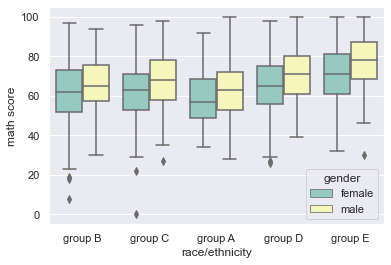

In [88]:
sns.set(style='darkgrid')
sns.boxplot(x='race/ethnicity', y='math score', hue='gender', data=df, palette='Set3');

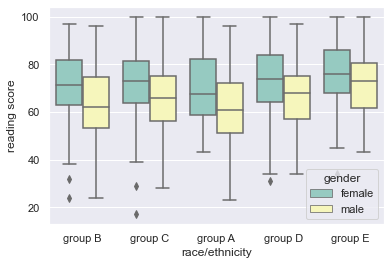

In [89]:
sns.boxplot(x='race/ethnicity', y='reading score', hue='gender', data=df, palette='Set3');

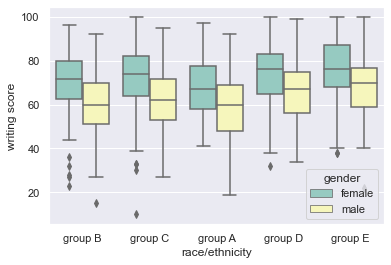

In [90]:
sns.boxplot(x='race/ethnicity', y='writing score', hue='gender', data=df, palette='Set3');

The plots above confirm that females score higher in reading and writing across groups and that males tend to score higher in math across groups. Interestingly, there are more outliers in the female data.

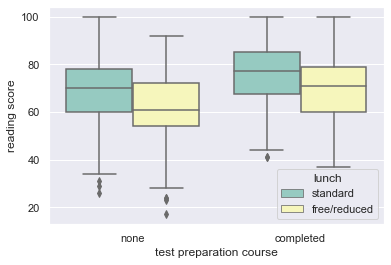

In [92]:
sns.boxplot(x='test preparation course', y='reading score', hue='lunch', data=df, palette='Set3');

This boxplot shows that test prep courses and socioeconomic status both predict test score distribution. Test prep courses positively affect participants regardless of background (whether their lunch is standard or free/reduced).

### Function for Histograms

In [114]:
math_df = df.drop(['reading score', 'writing score'], axis=1)
math_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,69
2,female,group B,master's degree,standard,none,90
3,male,group A,associate's degree,free/reduced,none,47
4,male,group C,some college,standard,none,76


In [161]:
# Takes in dataframe with a single scoring subject, returns histograms of scores organized by group (race/ethnicity)
def make_hist(dataframe):
    grouped_df = dataframe.groupby('race/ethnicity')
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle('Distribution of {}'.format(dataframe.columns[-1].title()))
    for index, (groupname, score) in enumerate(grouped_df):
        ax = plt.subplot(2,3,index+1)
        score.hist(bins=10, ax=ax)
        ax.set_title(groupname)
        ax.set_xlabel('score')
        ax.set_ylabel('frequency')

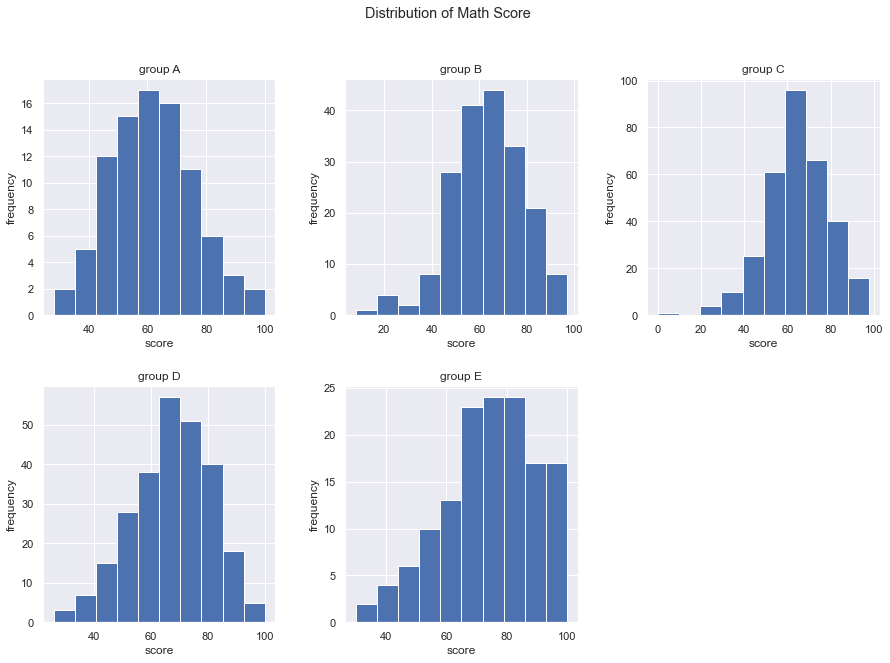

In [162]:
make_hist(math_df);

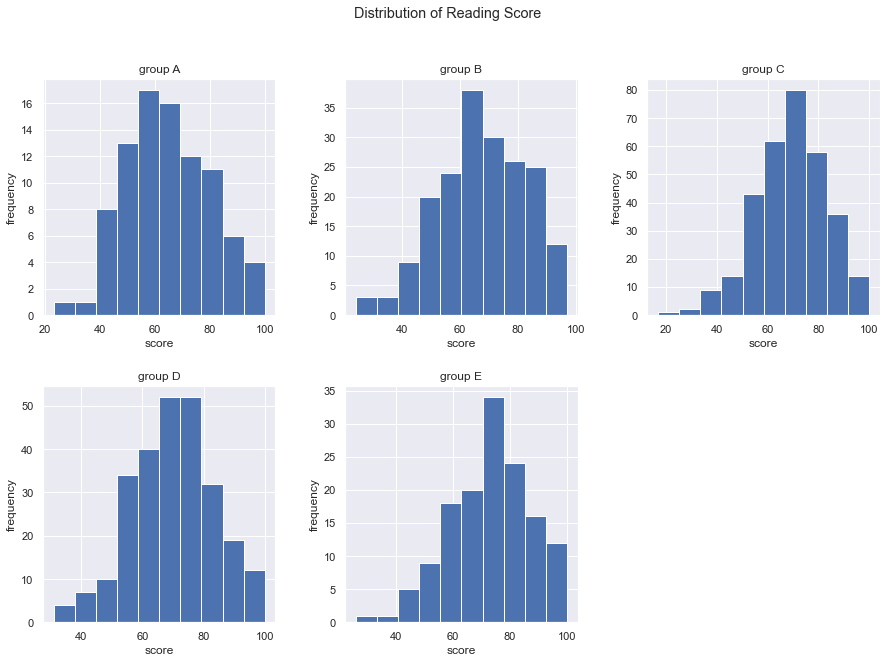

In [163]:
reading_df = df.drop(['math score', 'writing score'], axis=1)
make_hist(reading_df);

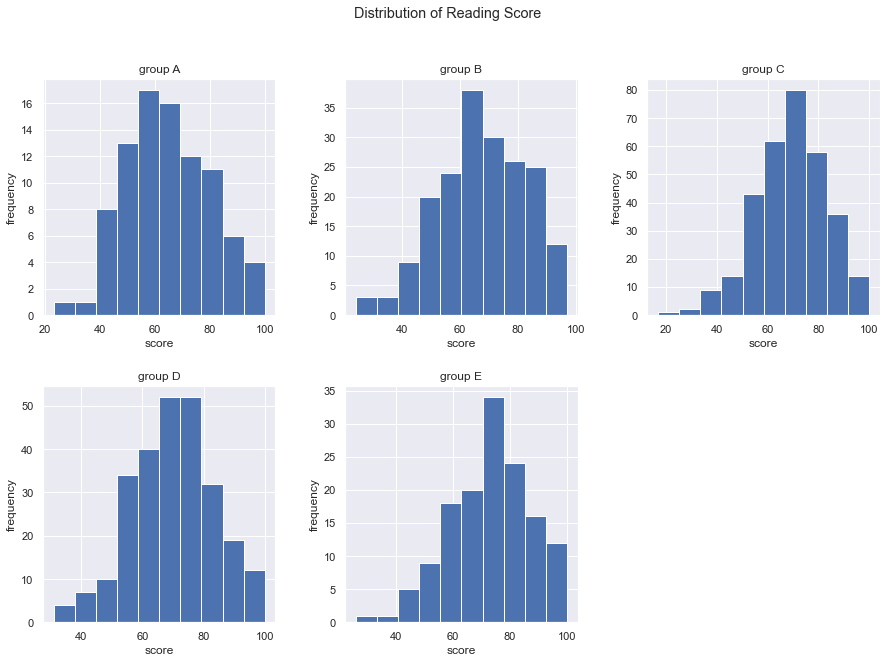

In [164]:
writing_df = df.drop(['math score', 'reading score'], axis=1)
make_hist(reading_df);